**What is a Term Deposit ?**

A time deposit or term deposit is a deposit in a financial institution with a specific maturity date or a period to maturity, commonly referred to as its "term". Time deposits differ from at call deposits, such as savings or checking accounts, which can be withdrawn at any time, without any notice or penalty. Deposits that require notice of withdrawal to be given are effectively time deposits, though they do not have a fixed maturity date.

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

The investor must understand when buying a term deposit that they can withdraw their funds only after the term ends. In some cases, the account holder may allow the investor early termination or withdrawal if they give several days notification. Also, there will be a penalty assessed for early termination.

**Objective:**
Business goal: Reducing marketing resources by identifying customers who would subscribe to term deposit and thereby direct marketing efforts to them.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')


# EDA


In [ ]:
df=pd.read_csv("Bank Campaign Data.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



#Key Features:

1. **Age:** The age of the client, represented in years.

2. **Job:** The client's occupation or employment status.

3. **Marital:** The marital status of the client (e.g., "married," "single," "divorced").

4. **Education:** The highest level of education attained by the client.

5. **Default:** Indicates whether the client has credit in default ("yes," "no").

6. **Balance:** The average yearly balance in euros.

7. **Housing:** Indicates whether the client has a housing loan ("yes," "no").

8. **Loan:** Indicates whether the client has a personal loan ("yes," "no").

9. **Contact:** The method of communication used to contact the client.

10. **Day:** The day of the month of the last contact.

11. **Month:** The month of the last contact.

12. **Duration:** The duration of the last contact in seconds.

13. **Campaign:** The number of contacts performed during the campaign.

14. **Pdays:** The number of days since the client was last contacted (999 means client was not previously contacted).

15. **Previous:** The number of contacts performed before this campaign.

16. **Poutcome:** The outcome of the previous marketing campaign (e.g., "success," "failure," "other").


# Target Variable:

**Term_Deposit_Subscribed(y)**: Whether the client subscribed to a term deposit ('yes' or 'no').

In [ ]:
df.shape

(45211, 17)

The `df.shape` output indicates that your dataset consists of 45,211 rows (customers) and 17 columns (features or attributes). Each row represents a unique customer in your dataset, and each column contains specific information or characteristics about these 45,211 customers.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB



- **Categorical Data:** Several columns in the dataset contain categorical data, including "job," "marital," "education," "default," "housing," "loan," "contact," "month," "poutcome," and "y."

- **Continuous Data:** Some columns in the dataset contain continuous or numerical data, including "age," "balance," "day," "duration," "campaign," "pdays," and "previous."

- **No Missing Values:** There are no missing values in any of the columns. All columns have 45211 non-null entries, indicating that the dataset is complete.




In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#**Interpretation**

- **Age:**
  - Count: Information is available for all 45,211 customers.
  - Mean Age: The average age of the customers is approximately 40.94 years.
  - Age Spread: Customers' ages vary from a minimum of 18 years to a maximum of 95 years.
  - Standard Deviation (std): The age data has a standard deviation of approximately 10.62 years, indicating the degree of age variation among customers.

  - Age Distribution:
    - 25% of customers are below or equal to 33 years old.
    - 50% of customers are below or equal to 39 years old (median).
    - 75% of customers are below or equal to 48 years old.

- **Balance:**
  - Count: Information on the balance is available for all 45,211 customers.
  - Average Balance: On average, customers have a balance of approximately 1,362.27 euros.
  - Balance Variation: Balances range from a minimum of -8,019 euros to a maximum of 102,127 euros.
  - Standard Deviation (std): The balance data has a standard deviation of approximately 3,044.77 euros, reflecting the level of variation in customer balances.
  - Balance Distribution:
    - 25% of customers have a balance of 72 euros or lower.
    - 50% of customers have a balance of 448 euros or lower (median).
    - 75% of customers have a balance of 1,428 euros or lower.

- **Day (of the Month of Contact):**
  - Count: Data about the day of contact is available for all 45,211 customers.
  - Average Day: The average day of contact during the month is approximately the 15th day.
  - Day Range: Days of contact range from the 1st to the 31st of the month.
  - Standard Deviation (std): The day data has a standard deviation of approximately 8.32 days, indicating the spread of contact dates.


- **Duration (of Contact):**
  - Count: Duration data is available for all 45,211 customers.
  - Average Duration: The average duration of contact is approximately 258.16 seconds.
  - Duration Variation: Contact durations vary from a minimum of 0 seconds to a maximum of 4,918 seconds.
  - Standard Deviation (std): The duration data has a standard deviation of approximately 257.53 seconds, indicating the degree of variation in contact durations.

  - Duration Distribution:
    - 25% of customers had a contact duration of 103 seconds or less.
    - 50% of customers had a contact duration of 180 seconds or less (median).
    - 75% of customers had a contact duration of 319 seconds or less.

- **Campaign (Number of Contacts):**
  - Count: Information about the number of campaign contacts is available for all 45,211 customers.
  - Average Contacts: On average, customers were contacted approximately 2.76 times during the campaign.
  - Contact Frequency: The number of contacts ranges from a minimum of 1 to a maximum of 63.
  - Standard Deviation (std): The campaign contact data has a standard deviation of approximately 3.10 contacts, showing the variability in the number of campaign contacts.

  - Contact Distribution:
    - 25% of customers were contacted once during the campaign.
    - 50% of customers were contacted two or fewer times (median).
    - 75% of customers were contacted three or fewer times.

- **Pdays (Days Since Last Contact):**
  - Count: Data about the number of days since the last contact is available for all 45,211 customers.
  - Pdays Range: The range of days since the last contact varies from a minimum of -1 (indicating no previous contact) to a maximum of 871 days.
  - Standard Deviation (std): The pdays data has a standard deviation of approximately 100.13 days, indicating the spread of days since the last contact.


- **Previous (Previous Contacts):**
  - Count: Information on previous contacts is available for all 45,211 customers.
  - Previous Contacts: On average, customers had approximately 0.58 previous contacts.
  - Previous Contact Range: The number of previous contacts varies from 0 to a maximum of 275 contacts.
  - Standard Deviation (std): The previous contact data has a standard deviation of approximately 2.30 contacts, reflecting the variation in the number of previous contacts.



In [ ]:
fig = px.bar(
    df.job.value_counts().reset_index().rename(columns={'index': 'Job', 'job': 'Count'}),
    x='Job',
    y='Count',
    color='Job',
    text='Count',
    template='plotly_dark',
)

fig.update_traces(marker=dict(line=dict(color='#FFFFFF', width=1.2)))
fig.update_layout(
    title_x=0.5,
    title_text='<b>Job Type of the Customers',
    font_family="Arial",
    title_font_family="Arial",
)


1. Management and Blue-collar Job type Clients are maximum in the bank
2. There are very less number of student customers in the bank

In [ ]:
import plotly.express as px

# Prepare data and create a pie chart
fig = px.pie(
    df.marital.value_counts().reset_index().rename(columns={'index': 'Marital-Status', 'marital': 'Count'}),
    names='Marital-Status',
    values='Count',
    hole=0.5,
    template='plotly_dark',
    color_discrete_sequence=['MediumPurple', 'Salmon', 'SteelBlue']  # Set custom colors
)

fig.update_traces(marker=dict(line=dict(color='#FFFFFF', width=1.2)))  # Change line color to white

fig.update_layout(
    title_x=0.5,
    showlegend=True,
    legend_title_text='<b>Marital-Status',
)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x=0.5,
    legend=dict(
        orientation='h',
        yanchor='top',
        y=-0.1,
        xanchor='center',
    )
)

fig.show()


Most of the clients in the bank are Married - 60.2% and Single - 28.3%

In [ ]:
import plotly.express as px

# Prepare data and create a pie chart
fig = px.pie(
    df,
    names='education',
    template='plotly_dark',  # You can change the template style here
)

# Update layout and appearance for the pie chart
fig.update_traces(marker=dict(line=dict(color='#FFFFFF', width=1.4)))  # Change line color and width here

# Customize the legend and title
fig.update_layout(
    title='<b>Education of the Customers',
    title_x=0.5,
    showlegend=True,
    legend_title_text='<b>Education',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
    ),
)

fig.show()


1. Most of the customers in the bank are related to Secondary - 51.3% and Tertiary - 29.4% Category
2. Only 15.2% of the clients are related to primary education category

In [ ]:
fig=go.Figure()
from plotly.subplots import make_subplots
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Credit in Default', 'Housing Loan','Personal Loan'))
fig.add_trace(go.Pie(values=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Count'],labels=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Default'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Has Credit in Default?',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Count'],labels=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Housing'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Housing Loan',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Count'],labels=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Loan'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Personal Loan',showlegend=True),row=1,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text=" ",title_text='<b style="color:black; font-size:100%;">Credit and Loan Analysis',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

1. **98.2%** customers in the bank doesn't have **Credit in Default**
2. **55.6%** customers in the bank doesn't have **Housing Loan**
3. **84%** customers in the bank doesn't have **Personal Loan**


In [ ]:
fig=px.pie(df.poutcome.value_counts().reset_index().rename(columns={'index':'Poutcome','poutcome':'Count'}),names='Poutcome',values='Count',hole=0.5,template='simple_white',color_discrete_sequence=['grey','red','blue','green'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Poutcome')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,title_text='<b>Outcome of previous marketing Campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.show()

1. From the Outcomes of the previous marketing Campaign most of the results are Unknown ~ 81.7% and Failure ~ 10.8% .
2. Success rate is very less ~ 3.34%
3. From the Analysis, on doing Marketing Campaigns there will be more Failure than Success.

## Outliers Checking

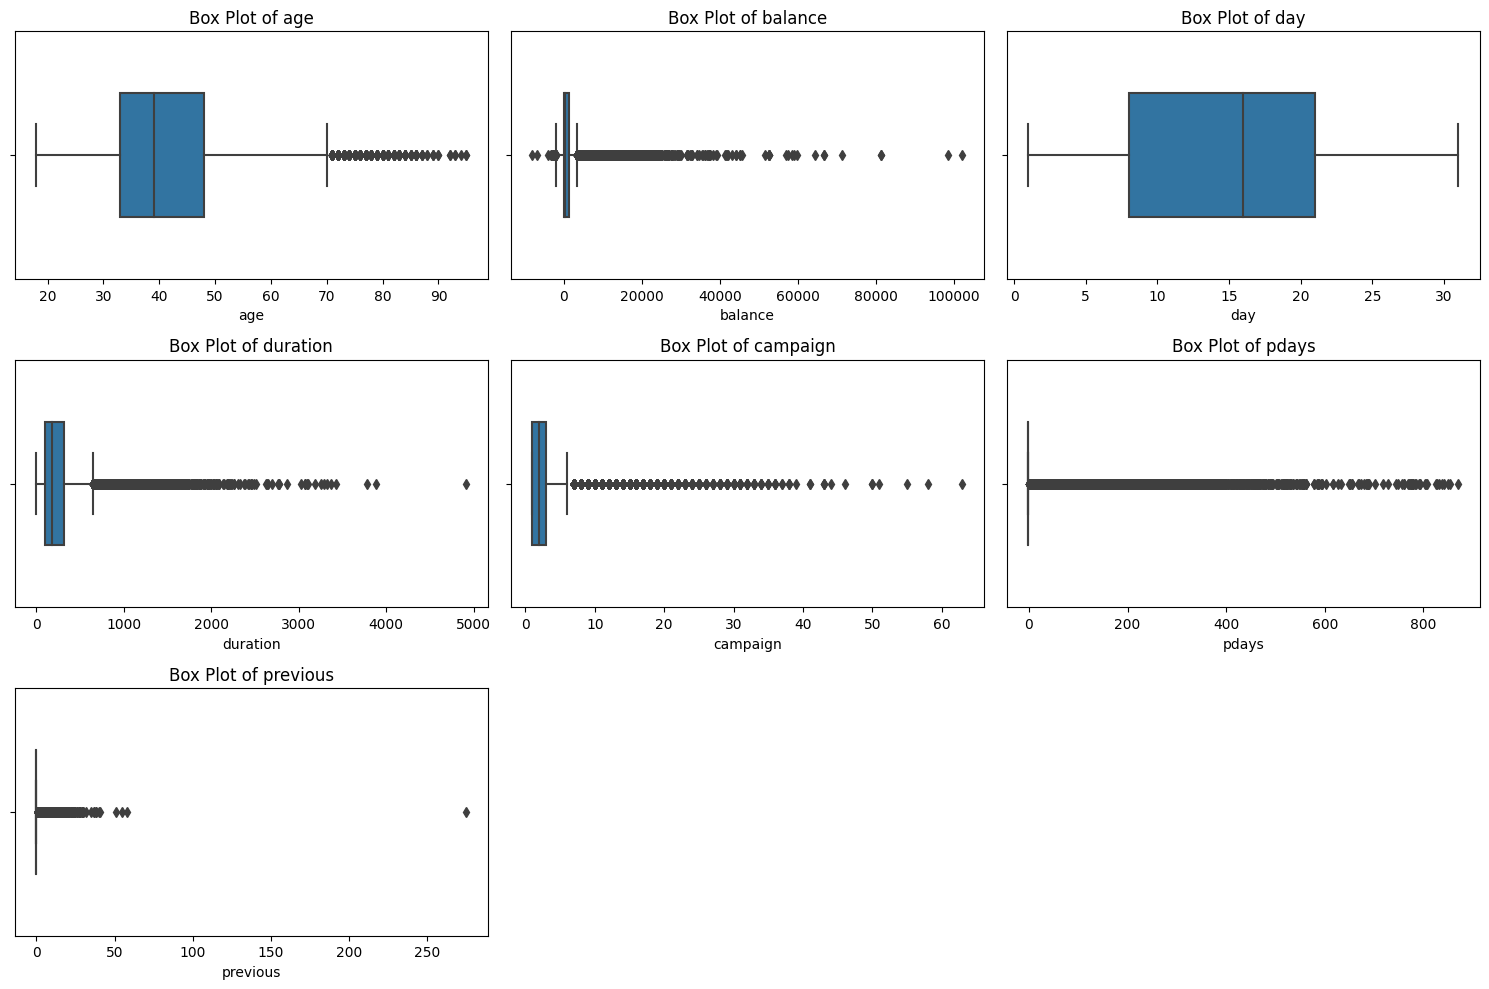

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
# List of continuous variable column names
continuous_vars = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# Create subplots for each continuous variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[var], orient="vertical", width=0.5)
    plt.title(f'Box Plot of {var}')
    plt.tight_layout()

# Show the plots
plt.show()



**Age:**
Outliers in the "age" variable may represent unique customer segments, and removing them could result in the loss of valuable insights into different age groups.

**Balance:**
Outliers in the "balance" variable might indicate affluent or financially challenged clients. Removing them may overlook high-value customers or those needing financial assistance.

**Duration:**
Outliers in the "duration" variable reflect highly engaged or disinterested customers. Eliminating them might hinder understanding the effectiveness of marketing campaigns.

**Campaign:**
Outliers in the "campaign" variable may have distinct responses. Removing them could exclude highly interested or less-contacted clients, impacting targeting strategies.

**Previous:**
Outliers in the "previous" variable may represent clients with extensive engagement history. Removing them may overlook valuable retention or upselling opportunities.

**Pdays (Days Since Last Contact):**
Outliers in the "pdays" variable could be dormant customers. Retaining them is crucial for understanding and re-engaging inactive clients.

## Correlation

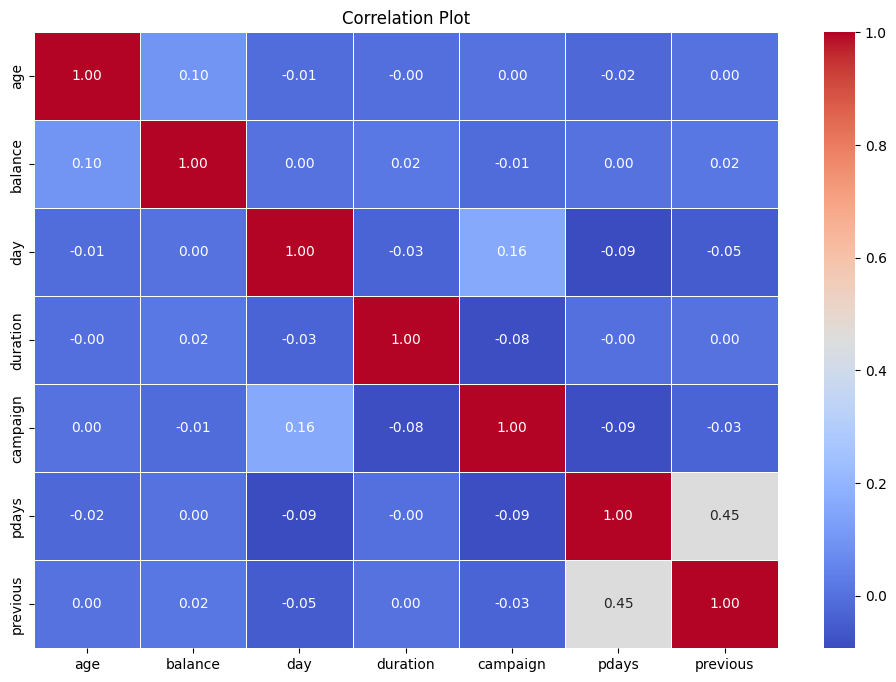

In [ ]:
warnings.filterwarnings("ignore")
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap-style correlation plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Plot")
plt.show()


**Weak correlations among our continuous variables indicate that our customers have diverse behavior patterns, and changes in one aspect do not strongly influence other aspects. This highlights the need for a nuanced, tailored approach in marketing, risk assessment, and customer management, recognizing the complexity and independence of customer characteristics.**

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


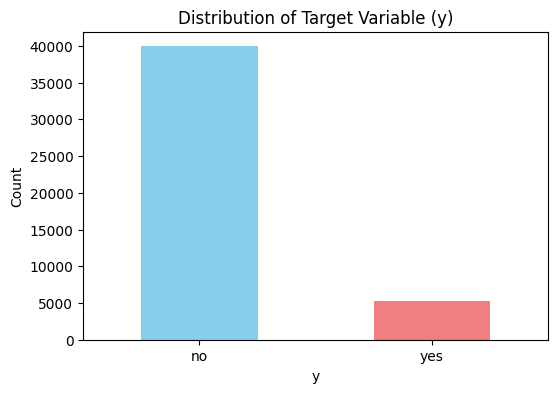

In [ ]:
# Count the values of the target variable 'y'
y_counts = df['y'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
y_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Target Variable (y)')
plt.xlabel('y')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

1. The imbalance in the target variable, with a higher number of 'no' responses and a lower count of 'yes' responses, can be attributed to the nature of the business scenario. Positive outcomes (e.g., customers subscribing to a term deposit) are relatively less common compared to negative outcomes (e.g., customers not subscribing). This reflects the typical response rate in marketing and financial services, where conversion rates are often lower than non-conversion rates. The imbalance is a natural consequence of the underlying customer behavior and is not unusual in such contexts.
2. **Modeling Challenges**: Imbalanced data can lead to challenges in predictive modeling, where the model may be biased toward the majority class. Ensuring model fairness and avoiding false negatives (misclassifying potential subscribers) is crucial.

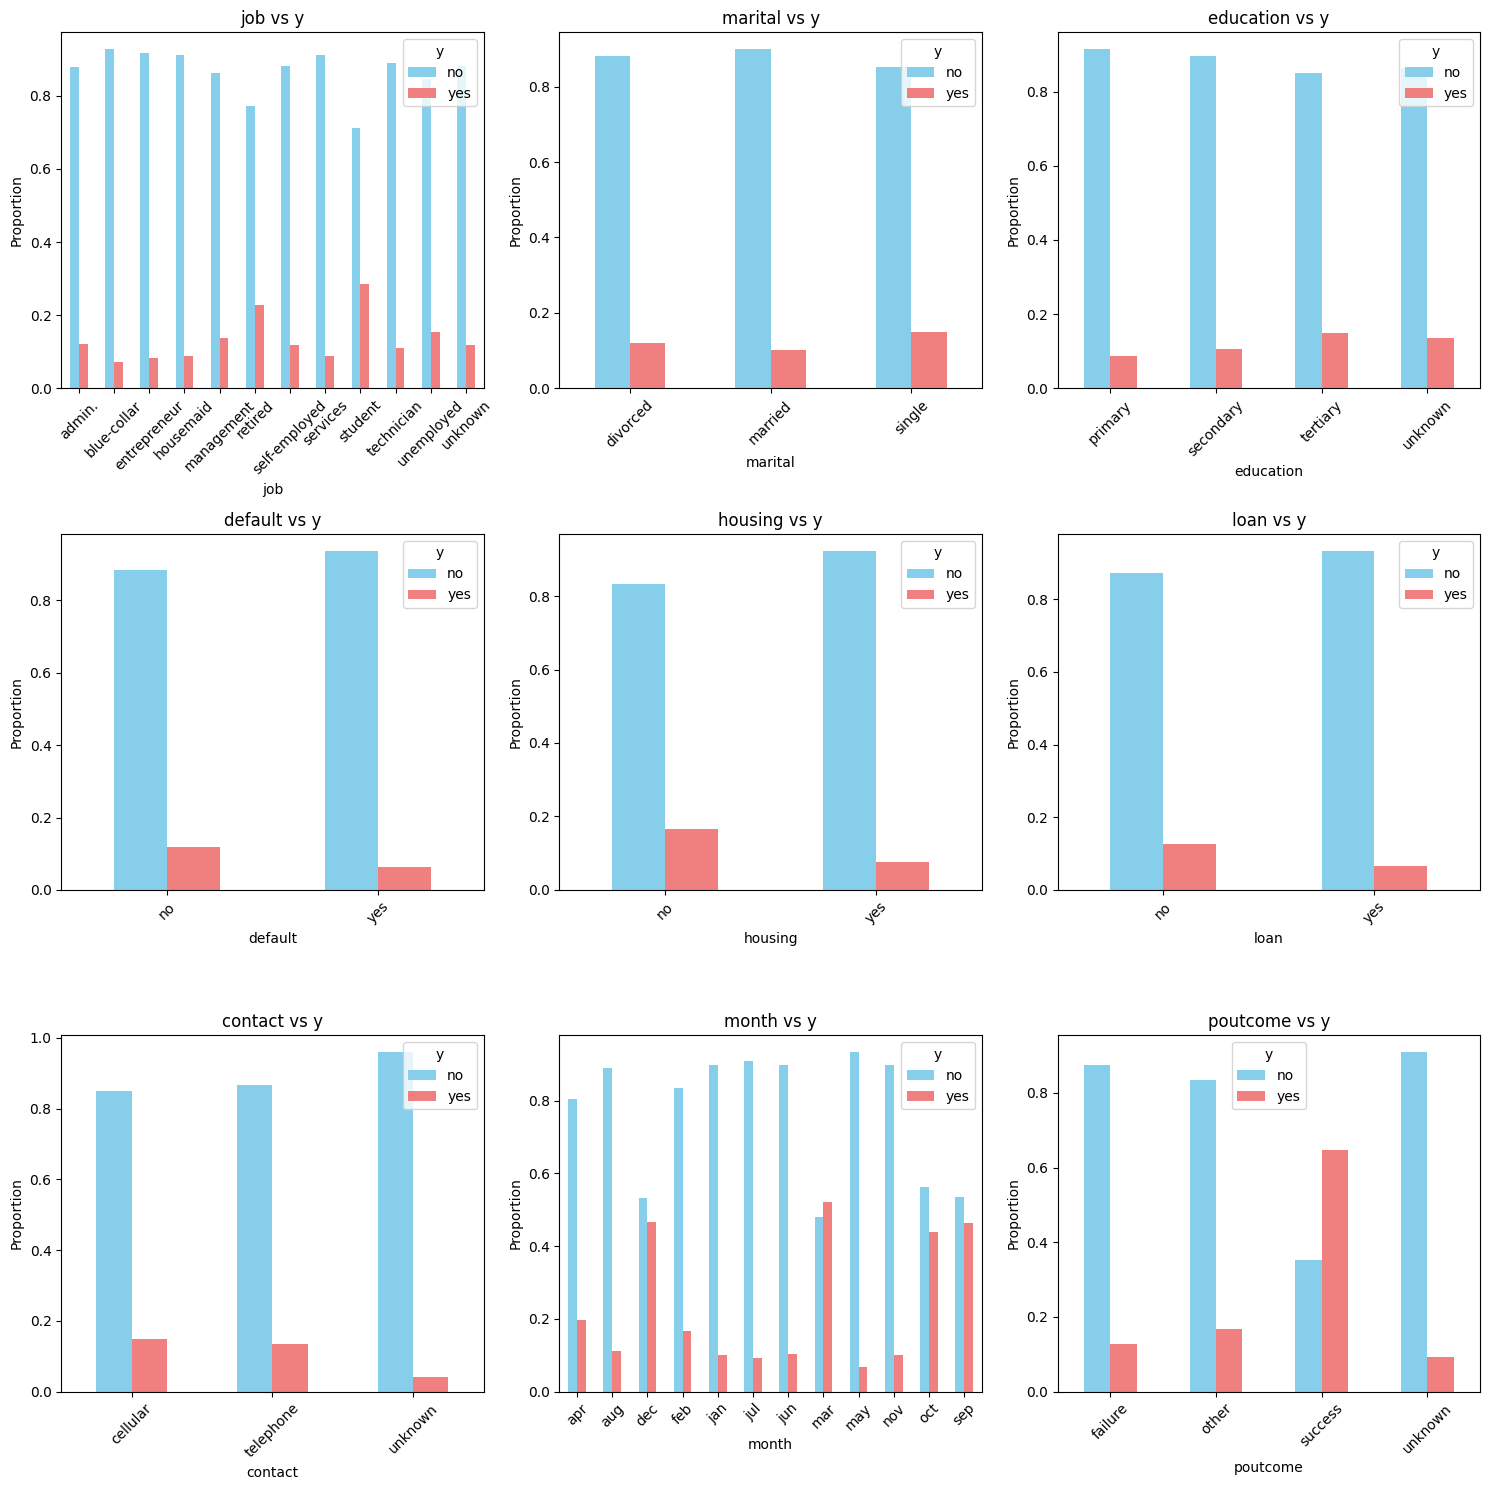

In [ ]:
# List of categorical variables
categorical_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

# Target variable
target_var = "y"

# Create subplots for each categorical variable
plt.figure(figsize=(15, 15))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)

    # Create a bar chart for the current categorical variable with respect to the target variable
    cross_tab = pd.crosstab(index=df[var], columns=df[target_var], normalize="index")
    cross_tab.plot(kind="bar", ax=plt.gca(), color=['skyblue', 'lightcoral'])

    plt.title(f'{var} vs {target_var}')
    plt.xlabel(var)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plots
plt.show()


1. **Customers with higher education** levels are more likely to subscribe to term deposits. This is consistent with the findings of other studies, which have shown that education is a strong predictor of financial literacy and financial decision-making.

2. **Customers who are single and divorced** are more likely to subscribe to term deposits. This may be because they are more likely to have a stable financial situation and are therefore more likely to be able to afford to save money.

3. **Customers who are students and retired  ** are more likely to subscribe to term deposits.

4. **Customers who have defaulted** on a previous loan are more likely to subscribe to term deposits.

5. **Customers who have a housing loan** are less likely to subscribe to term deposits. This may be because people who have a housing loan are more likely to be concerned about financial security.

6. **Customers who have a personal loan** are less likely to subscribe to term deposits. This may be because people who have a personal loan are already in debt and are therefore less likely to be able to afford to save money.

7. **Customers who are contacted by telephone and cellular** are more likely to subscribe to term deposits. This is likely because telephone marketing is a more personal way to reach customers and is therefore more likely to be effective.

8. **Customers who were contacted in the month of December,March,October and September** are more likely to subscribe to term deposits.

9. **Customers who had a successful outcome from the previous marketing campaign are more likely** to subscribe to term deposits. This is likely because people who have had a positive experience with a company are more likely to do business with them again.

# Preprocess and Feature Engineering

In [ ]:
df2=df

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
scaler = StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [ ]:
df = pd.get_dummies(df, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"], drop_first=True)


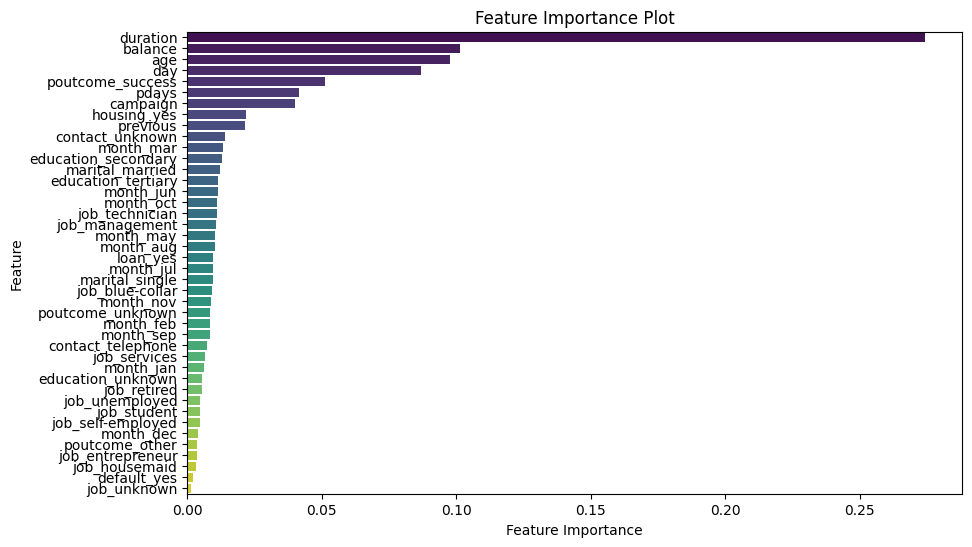

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Extract features and target
X = df.drop(columns=['y'])
y = df['y']


model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


1. The duration of a bank telemarketing call is the most important feature for predicting whether a customer will open a term deposit. This makes sense because the longer a customer stays on the call, the more likely they are to be interested in the term deposit product.
2. Balance: Customers with a high balance are more likely to be financially stable and have the disposable income to invest in a term deposit.
3. Age: Older customers are more likely to be interested in long-term savings products, such as term deposits. This is because they are closer to retirement and need to save for their retirement income.

In [ ]:
from sklearn.model_selection import train_test_split
# Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df2, test_size=0.3, random_state=42)


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler


X = train_df.drop(columns=['y'])  # Features
y = train_df['y']  # Target variable

# Create an instance of RandomOverSampler to balance the dataset
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new balanced DataFrame
df_train = pd.concat([X_resampled, y_resampled], axis=1)


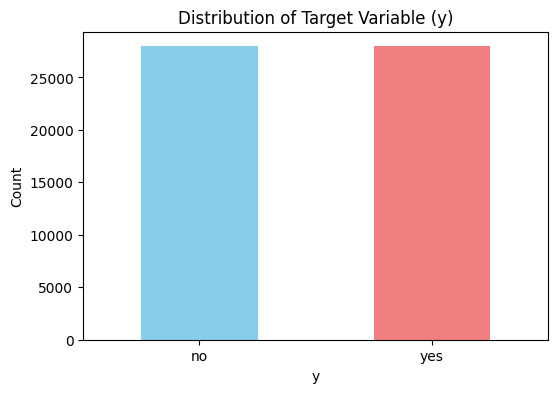

In [ ]:
# Count the values of the target variable 'y'
y_counts = df_train['y'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
y_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Target Variable (y)')
plt.xlabel('y')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Now 'df_balanced' contains the balanced dataset with the same features and target variable**


In [ ]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-0.464863,technician,single,tertiary,no,-0.447419,no,no,unknown,0.143418,jun,-0.408361,0.399020,-0.411453,-0.251940,unknown,no
1,1.418617,entrepreneur,married,secondary,no,-0.383046,no,no,cellular,0.383734,nov,0.209055,0.076230,-0.411453,-0.251940,unknown,no
2,0.476877,blue-collar,married,secondary,no,-0.447419,yes,no,unknown,-1.298476,jun,-0.680179,-0.246560,-0.411453,-0.251940,unknown,no
3,0.006007,management,divorced,tertiary,no,0.677803,no,no,cellular,-1.779108,oct,0.170224,-0.569351,0.787017,1.918749,success,no
4,-0.276515,blue-collar,married,secondary,no,-0.447419,yes,no,unknown,0.503892,may,-0.652997,-0.569351,-0.411453,-0.251940,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55907,0.288529,technician,married,tertiary,no,1.056818,yes,no,unknown,-0.096898,may,2.535043,-0.246560,-0.411453,-0.251940,unknown,yes
55908,-0.464863,self-employed,divorced,tertiary,no,-0.002717,yes,no,cellular,-0.217055,may,5.688136,-0.569351,3.153996,0.616335,success,yes
55909,0.006007,blue-collar,married,secondary,no,-0.041472,yes,no,cellular,-0.577529,may,2.535043,0.076230,-0.411453,-0.251940,unknown,yes
55910,0.006007,unemployed,married,secondary,no,-0.093694,yes,yes,telephone,-0.817845,dec,-0.198672,0.076230,3.463601,0.616335,failure,yes


In [ ]:
!pip install pycaret


In [ ]:
from pycaret.classification import *

# Initialize the PyCaret environment with GPU
exp1 = setup(data=df_train, target='y', session_id=123, categorical_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(55912, 17)"
5,Transformed data shape,"(55912, 49)"
6,Transformed train set shape,"(39138, 49)"
7,Transformed test set shape,"(16774, 49)"
8,Ordinal features,3
9,Numeric features,7


In [ ]:
# Compare and select the best model
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9764,0.9993,0.9959,0.9585,0.9768,0.9527,0.9535,6.0760
rf,Random Forest Classifier,0.9638,0.9991,0.9976,0.9344,0.9650,0.9276,0.9297,5.6340
dt,Decision Tree Classifier,0.9549,0.9549,0.9970,0.9197,0.9568,0.9099,0.9131,1.1110
xgboost,Extreme Gradient Boosting,0.9252,0.9691,0.9665,0.8928,0.9282,0.8504,0.8534,9.4420
knn,K Neighbors Classifier,0.9057,0.9510,0.9691,0.8601,0.9113,0.8114,0.8180,2.9360
lightgbm,Light Gradient Boosting Machine,0.9003,0.9543,0.9450,0.8675,0.9046,0.8006,0.8039,3.5060
gbc,Gradient Boosting Classifier,0.8604,0.9295,0.8881,0.8415,0.8642,0.7208,0.7220,7.2920
ada,Ada Boost Classifier,0.8399,0.9148,0.8307,0.8464,0.8384,0.6799,0.6800,2.9730
lr,Logistic Regression,0.8324,0.9100,0.8182,0.8421,0.8299,0.6647,0.6650,1.8870
svm,SVM - Linear Kernel,0.8322,0.0000,0.8342,0.8312,0.8324,0.6644,0.6648,1.1970


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**So, best model is Extra tree classifier**

In [ ]:
# predicting validation dataset
predict_model(best_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9781,0.9995,0.9781,0.9788,0.9781,0.9562,0.9569


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,prediction_label,prediction_score
9752,-0.747384,unemployed,single,tertiary,no,-0.447419,yes,no,cellular,-1.178319,may,-0.520971,-0.569351,-0.411453,-0.251940,unknown,0,no,0.94
30825,0.288529,technician,married,secondary,no,2.064789,no,no,cellular,0.503892,aug,-0.272452,1.044601,-0.411453,-0.251940,unknown,0,no,0.98
19503,-0.088167,services,married,secondary,no,-0.447419,no,no,unknown,-0.457371,jun,1.106056,-0.246560,-0.411453,-0.251940,unknown,0,no,0.96
18678,1.512791,management,married,tertiary,no,-0.263167,no,no,unknown,-1.298476,jun,-0.920932,-0.569351,-0.411453,-0.251940,unknown,0,no,1.00
51319,-1.029906,management,married,tertiary,no,2.209300,yes,no,cellular,0.263576,mar,-0.101594,-0.246560,2.534786,0.616335,failure,1,yes,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37186,0.476877,unemployed,married,secondary,no,-0.143287,no,no,cellular,-1.058161,jul,0.492523,0.721811,-0.411453,-0.251940,unknown,1,yes,1.00
50323,1.701139,technician,married,secondary,no,-0.403080,yes,yes,cellular,0.864365,jul,0.612899,0.399020,-0.411453,-0.251940,unknown,1,yes,1.00
3476,1.230269,blue-collar,divorced,primary,no,2.959777,yes,no,cellular,0.503892,nov,0.096445,-0.246560,1.486125,0.616335,other,0,no,0.71
49130,-1.218254,technician,single,secondary,no,-0.372864,no,no,cellular,1.705471,apr,0.077029,-0.569351,-0.411453,-0.251940,unknown,1,yes,1.00


1. Accuracy: The proportion of correctly predicted instances out of the total instances. In your case, it's 97.81%, meaning the model predicted correctly for 97.81% of the cases.

2. AUC (Area Under the ROC Curve): AUC measures the model's ability to distinguish between positive and negative classes. A higher AUC value (close to 1) indicates a better model. In your case, it's 0.9995, which is very close to 1, suggesting excellent model discrimination.

3. Recall (Sensitivity): The ratio of correctly predicted positive instances to the total actual positive instances. In your case, it's 97.81%, meaning the model correctly identified 97.81% of the actual positive cases.

4. Precision (Positive Predictive Value): The ratio of correctly predicted positive instances to the total predicted positive instances. In your case, it's 97.88%, meaning that when the model predicts a positive instance, it's correct 97.88% of the time.

5. F1 Score: The harmonic mean of precision and recall. It balances both metrics and is useful when dealing with imbalanced datasets. In your case, it's also 97.81%.

6. Kappa (Cohen's Kappa): Kappa measures the agreement between the model's predictions and the actual outcomes, considering the possibility of the agreement occurring by chance. A higher Kappa indicates better agreement. In your case, it's 0.9562, indicating substantial agreement.

7. MCC (Matthews Correlation Coefficient): MCC takes into account true positives, true negatives, false positives, and false negatives and is especially useful when dealing with imbalanced datasets. It ranges from -1 (completely wrong) to 1 (perfect prediction). In your case, it's 0.9569, indicating a strong positive correlation between predictions and actual outcomes.

In [ ]:
# Make predictions on the test dataset
predictions = predict_model(best_model, data=test_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8999,0.9079,0.8999,0.8892,0.8926,0.4514,0.4591


1. Accuracy: The model's accuracy on the test dataset is 89.99%. This means that out of all the instances in the test dataset, the model predicted the correct class for approximately 89.99% of them.

2. AUC (Area Under the ROC Curve): The AUC value is 0.9079, indicating that the model has good discriminatory power on the test data. An AUC value close to 1 suggests that the model can effectively distinguish between positive and negative instances.

3. Recall (Sensitivity): The recall score is 89.99%, which means that the model correctly identified approximately 89.99% of the actual positive cases in the test dataset.

4. Precision (Positive Predictive Value): The precision score is 88.92%, indicating that when the model predicts a positive instance on the test data, it is correct approximately 88.92% of the time.

5. F1 Score: The F1 score is 89.26%, which is the harmonic mean of precision and recall. It provides a balance between these two metrics.

6. Kappa (Cohen's Kappa): The Kappa value is 0.4514. Kappa measures the agreement between the model's predictions and the actual outcomes, accounting for chance agreement. In this case, the agreement is relatively low.

7. MCC (Matthews Correlation Coefficient): The MCC value is 0.4591. MCC takes into account true positives, true negatives, false positives, and false negatives and ranges from -1 to 1. A value of 0 indicates no better than random prediction, while higher values indicate better predictive performance.

In summary, your model's performance on the test dataset is reasonable but not as high as on the validation dataset. It still achieves a decent level of accuracy, recall, precision, and AUC, suggesting that it has generalization capability. However, the Kappa and MCC values indicate that there might be room for improvement in terms of agreement between predictions and actual outcomes on the test data. It's essential to consider the specific context and requirements of your problem when interpreting these metrics and deciding whether the model meets your criteria for performance.







In [ ]:
# Save and finalize the model
save_model(best_model, 'final_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day',
                                              'duration', 'campaign', 'pdays',
                                              'previous'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
               

In [ ]:
# Import necessary libraries
from pycaret.classification import load_model

# Load the saved model
saved_model = load_model('final_model')


Transformation Pipeline and Model Successfully Loaded


In [ ]:
# Check the column names in the predictions DataFrame
print(predictions.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'prediction_label', 'prediction_score'],
      dtype='object')


In [ ]:
from sklearn.metrics import classification_report
# Generate a classification report
true_labels=test_df['y']
report = classification_report(true_labels,predictions['prediction_label'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

          no       0.93      0.96      0.94     11966
         yes       0.60      0.43      0.51      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.70      0.72     13564
weighted avg       0.89      0.90      0.89     13564



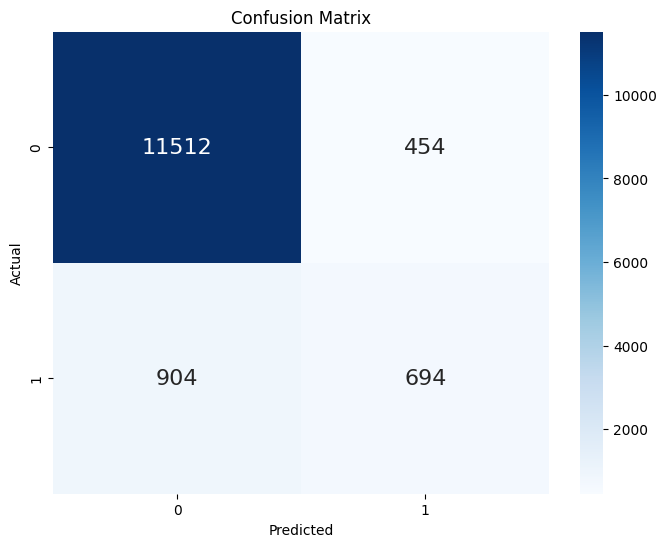

In [ ]:
from sklearn.metrics import confusion_matrix
# Extract the predicted labels from the 'prediction_label' column in the 'predictions' DataFrame
predicted_labels = predictions['prediction_label']

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
